In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def ghfilter(data, x0, dx, g, h, dt):
    """
    Applies a g-h filter to noisy measurement data.

    Parameters:
    - data: list of noisy measurements
    - x0: initial position estimate
    - dx: initial velocity estimate
    - g: position gain (g-factor)
    - h: velocity gain (h-factor)
    - dt: time interval between measurements

    Returns:
    - predicted_positions: list of predicted positions before correction
    - corrected_positions: list of updated position estimates after correction
    """

    predicted_positions = []
    corrected_positions = []

    for i in range(len(data)):
        z = data[i]

        # Estimate the next position based on previous velocity
        x_pred = x0 + dx * dt
        predicted_positions.append(x_pred)

        # Calculate difference between measurement and prediction
        residual = z - x_pred

        # Correct position and velocity based on gains
        x0 = x_pred + g * residual
        dx += h * residual / dt

        corrected_positions.append(x0)

    return predicted_positions, corrected_positions


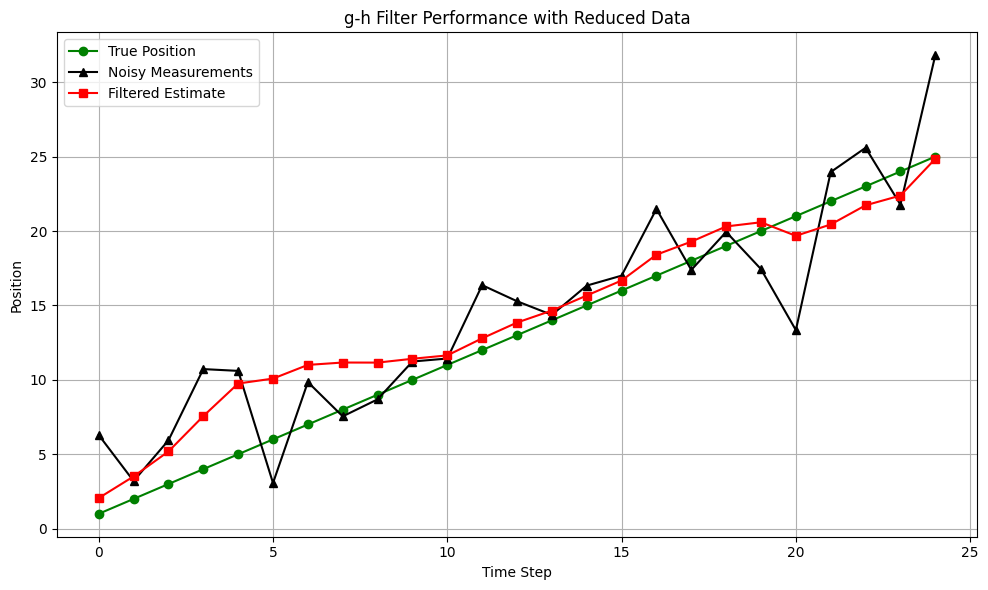

In [13]:
def simulate_data(x0, dx, noise_std, steps, dt):
    true_positions = []
    data = []
    current_position = x0
    for _ in range(steps):
        current_position = current_position + dx * dt
        true_positions.append(current_position)
        noisy_value = current_position + np.random.normal(0, noise_std)
        data.append(noisy_value)
    return np.array(true_positions), np.array(data)

def ghfilter(data, x0, dx, g, h, dt):
    predicted_positions = []
    corrected_positions = []

    for z in data:
        x_pred = x0 + dx * dt
        predicted_positions.append(x_pred)
        error = z - x_pred
        x0 = x_pred + g * error
        dx = dx + h * error / dt
        corrected_positions.append(x0)

    return np.array(predicted_positions), np.array(corrected_positions)

np.random.seed(0)
x0 = 0
dx = 1
noise_std = 3
steps = 25
dt = 1.0
g = 0.2
h = 0.1

true_positions, data = simulate_data(x0, dx, noise_std, steps, dt)
_, filtered_positions = ghfilter(data, x0, dx, g, h, dt)

mse_noisy = np.mean((data - true_positions) ** 2)
mse_filtered = np.mean((filtered_positions - true_positions) ** 2)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(true_positions, 'g-o', label="True Position")
plt.plot(data, 'k-^', label="Noisy Measurements")
plt.plot(filtered_positions, 'r-s', label="Filtered Estimate")
plt.title("g-h Filter Performance with Reduced Data")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

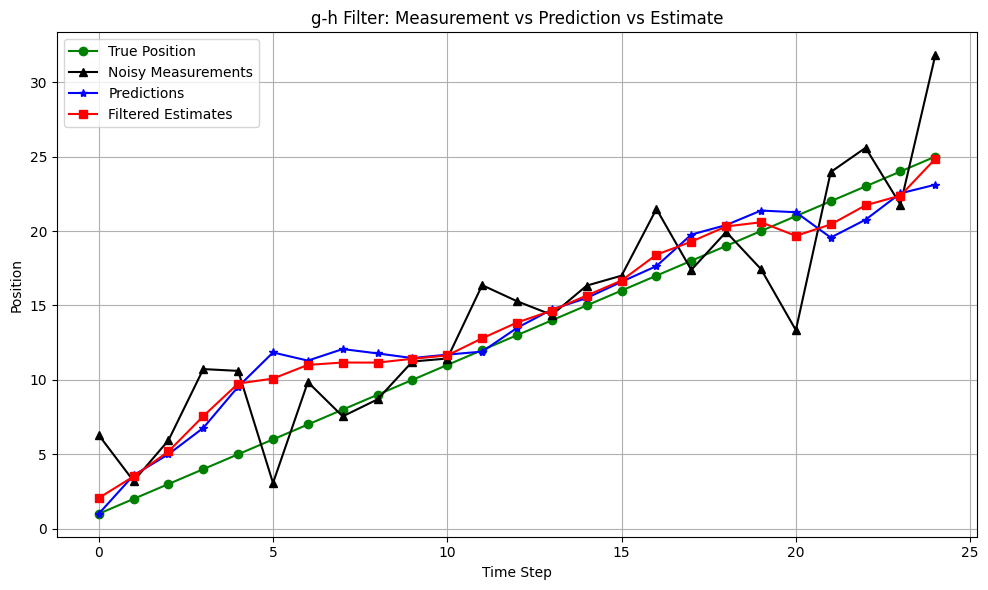

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_data(x0, dx, noise_std, steps, dt):
    true_positions = []
    data = []
    current_position = x0
    for _ in range(steps):
        current_position += dx * dt
        true_positions.append(current_position)
        noisy_value = current_position + np.random.normal(0, noise_std)
        data.append(noisy_value)
    return np.array(true_positions), np.array(data)

def ghfilter_with_prediction(data, x0, dx, g, h, dt):
    corrected_positions = []
    predicted_positions = []

    for z in data:
        x_pred = x0 + dx * dt
        predicted_positions.append(x_pred)
        error = z - x_pred
        x0 = x_pred + g * error
        dx = dx + h * error / dt
        corrected_positions.append(x0)

    return np.array(predicted_positions), np.array(corrected_positions)

np.random.seed(0)
x0 = 0
dx = 1
noise_std = 3
steps = 25
dt = 1.0
g = 0.2
h = 0.1

true_positions, data = simulate_data(x0, dx, noise_std, steps, dt)
predicted_positions, corrected_positions = ghfilter_with_prediction(data, x0, dx, g, h, dt)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(true_positions, 'go-', label='True Position')
plt.plot(data, 'k-^', label='Noisy Measurements')
plt.plot(predicted_positions, 'b-*', label='Predictions')
plt.plot(corrected_positions, 'r-s', label='Filtered Estimates')
plt.title("g-h Filter: Measurement vs Prediction vs Estimate")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


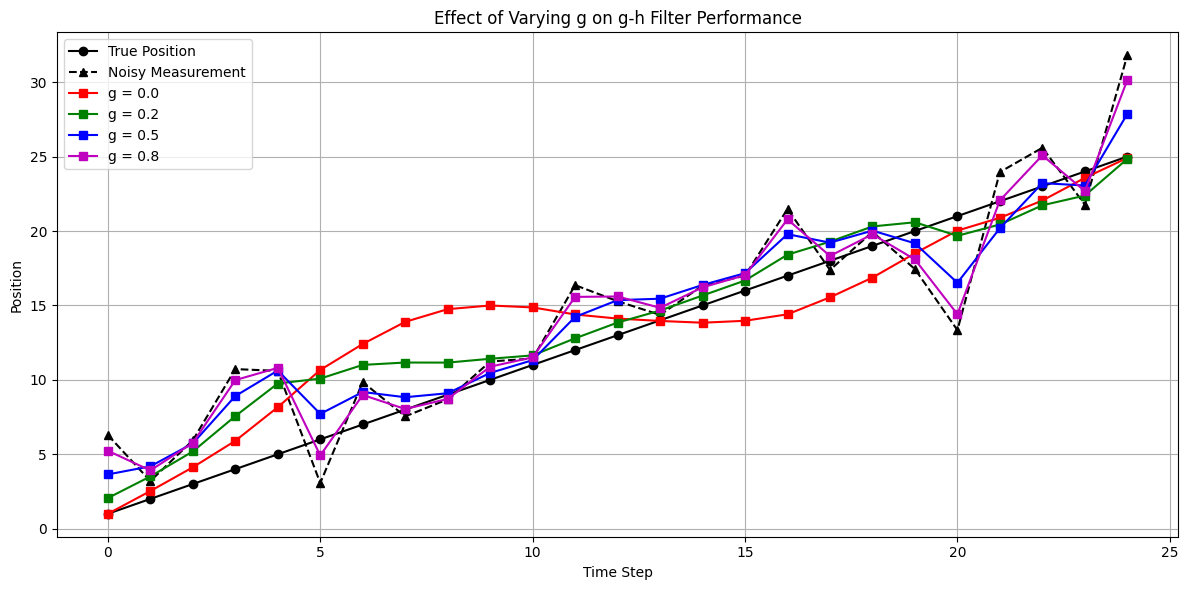

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_data(x0, dx, noise_std, steps, dt):
    true_positions = []
    data = []
    current_position = x0
    for _ in range(steps):
        current_position += dx * dt
        true_positions.append(current_position)
        noisy_value = current_position + np.random.normal(0, noise_std)
        data.append(noisy_value)
    return np.array(true_positions), np.array(data)

def ghfilter(data, x0, dx, g, h, dt):
    corrected_positions = []
    for z in data:
        x_pred = x0 + dx * dt
        error = z - x_pred
        x0 = x_pred + g * error
        dx = dx + h * error / dt
        corrected_positions.append(x0)
    return np.array(corrected_positions)

np.random.seed(0)
x0 = 0
dx = 1
noise_std = 3
steps = 25
dt = 1.0
h = 0.1

true_positions, data = simulate_data(x0, dx, noise_std, steps, dt)

g_values = [0.0, 0.2, 0.5, 0.8]
colors = ['r', 'g', 'b', 'm']

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_positions, 'ko-', label="True Position")
plt.plot(data, 'k--^', label="Noisy Measurement")

for i, g in enumerate(g_values):
    filtered = ghfilter(data, x0, dx, g, h, dt)
    plt.plot(filtered, f'{colors[i]}-s', label=f'g = {g}')

plt.title("Effect of Varying g on g-h Filter Performance")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


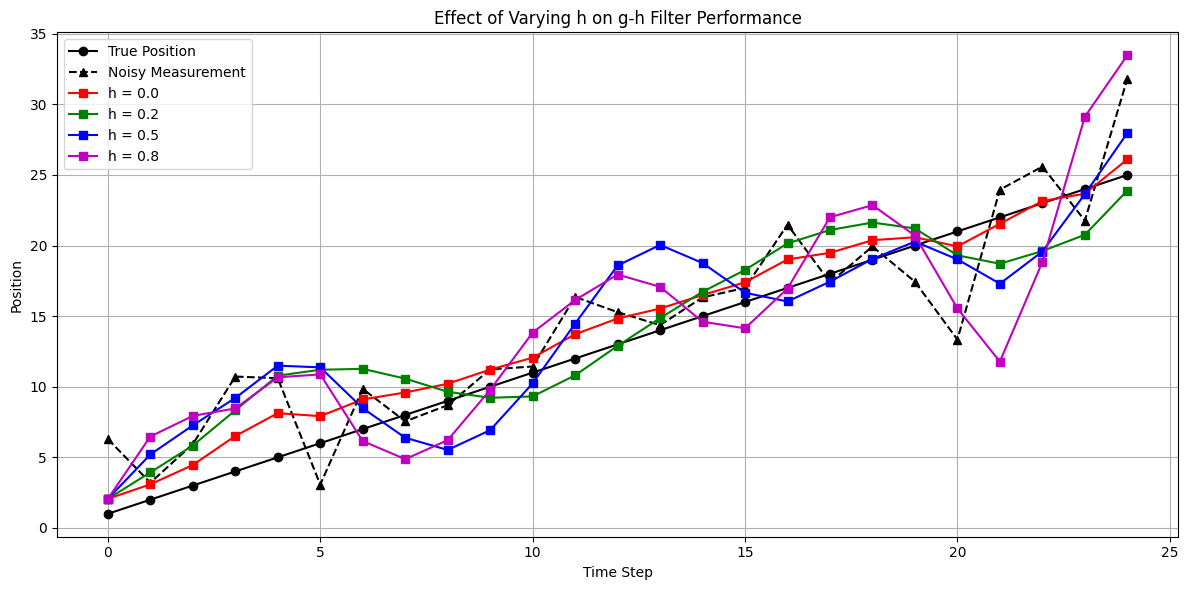

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_data(x0, dx, noise_std, steps, dt):
    true_positions = []
    data = []
    current_position = x0
    for _ in range(steps):
        current_position += dx * dt
        true_positions.append(current_position)
        noisy_value = current_position + np.random.normal(0, noise_std)
        data.append(noisy_value)
    return np.array(true_positions), np.array(data)

def ghfilter(data, x0, dx, g, h, dt):
    corrected_positions = []
    for z in data:
        x_pred = x0 + dx * dt
        error = z - x_pred
        x0 = x_pred + g * error
        dx = dx + h * error / dt
        corrected_positions.append(x0)
    return np.array(corrected_positions)


np.random.seed(0)
x0 = 0
dx = 1
noise_std = 3
steps = 25
dt = 1.0
g = 0.2

true_positions, data = simulate_data(x0, dx, noise_std, steps, dt)

h_values = [0.0, 0.2, 0.5, 0.8]
colors = ['r', 'g', 'b', 'm']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(true_positions, 'ko-', label="True Position")
plt.plot(data, 'k--^', label="Noisy Measurement")

for i, h in enumerate(h_values):
    filtered = ghfilter(data, x0, dx, g, h, dt)
    plt.plot(filtered, f'{colors[i]}-s', label=f'h = {h}')

plt.title("Effect of Varying h on g-h Filter Performance")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore")

def simulate_data(x0, dx, noise_std, steps, dt):
    true_positions = []
    data = []
    current_position = x0
    for _ in range(steps):
        current_position += dx * dt
        true_positions.append(current_position)
        noisy_value = current_position + np.random.normal(0, noise_std)
        data.append(noisy_value)
    return np.array(true_positions), np.array(data)

def ghfilter(data, x0, dx, g, h, dt):
    corrected_positions = []
    for z in data:
        x_pred = x0 + dx * dt
        error = z - x_pred
        x0 = x_pred + g * error
        dx = dx + h * error / dt
        corrected_positions.append(x0)
    return np.array(corrected_positions)

@interact(
    x0=FloatSlider(value=0.0, min=-10.0, max=10.0, step=1.0, description='x₀'),
    dx=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.5, description='dx'),
    g=FloatSlider(value=0.2, min=0.0, max=1.0, step=0.05, description='g'),
    h=FloatSlider(value=0.1, min=0.0, max=1.0, step=0.05, description='h')
)
def plot_gh_filter(x0, dx, g, h):
    np.random.seed(0)
    steps = 25
    dt = 1.0
    noise_std = 2

    true_positions, data = simulate_data(x0, dx, noise_std, steps, dt)
    filtered_positions = ghfilter(data, x0, dx, g, h, dt)

    plt.figure(figsize=(10, 6))
    plt.plot(true_positions, 'go-', label='True Position')
    plt.plot(data, 'k--^', label='Noisy Measurement')
    plt.plot(filtered_positions, 'r-s', label='Filtered Estimate')
    plt.title(f"g-h Filter Output\nx₀={x0}, dx={dx}, g={g}, h={h}")
    plt.xlabel("Time Step")
    plt.ylabel("Position")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='x₀', max=10.0, min=-10.0, step=1.0), FloatSlider(val…